In [1]:
from keras.datasets import mnist

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Check dataset dimensions
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [4]:
# Check dataset dimensions
print(f"x_train shape: {x_test.shape}")
print(f"y_train shape: {y_test.shape}")

x_train shape: (10000, 28, 28)
y_train shape: (10000,)


In [5]:
"""### Step 2B - Displaying Images Using Matplotlib"""
import numpy as np
import matplotlib.pyplot as plt

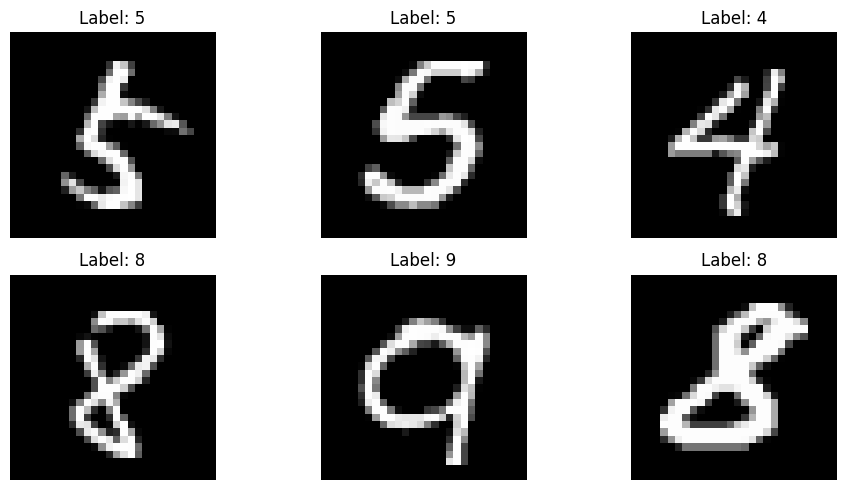

In [6]:
# Display 6 random images using Matplotlib
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    random_num = np.random.randint(0, len(x_train))
    plt.imshow(x_train[random_num], cmap='gray')
    plt.title(f"Label: {y_train[random_num]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Reshape data to add channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Check dataset dimensions
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
y_train shape: (10000, 28, 28, 1)


In [9]:
# Convert data type and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [11]:
"""### Step 3B - One Hot Encode Labels"""
from tensorflow.keras.utils import to_categorical

# One hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(f"Number of Classes: {y_test.shape[1]}")

Number of Classes: 10


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD


In [14]:
# Create model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\Karthick Selvam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [16]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6763 - loss: 0.9874 - val_accuracy: 0.9387 - val_loss: 0.2051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9038 - loss: 0.3184 - val_accuracy: 0.9580 - val_loss: 0.1401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9311 - loss: 0.2288 - val_accuracy: 0.9659 - val_loss: 0.1114
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9466 - loss: 0.1789 - val_accuracy: 0.9744 - val_loss: 0.0833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9548 - loss: 0.1523 - val_accuracy: 0.9765 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9624 - loss: 0.1244 - val_accuracy: 0.9812 - val_loss: 0.0619
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9671 - loss: 0.1120 - val_accuracy: 0.9821 - val_loss: 0.0561
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9700 -

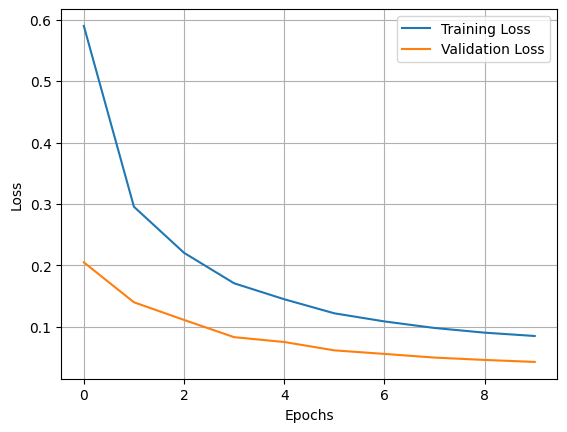

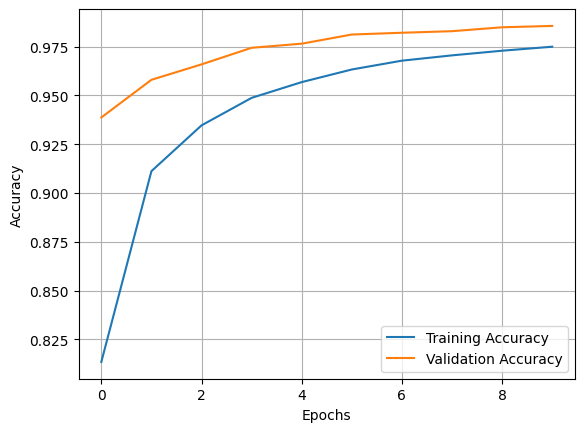

In [18]:
"""### Step 6 - Plotting Loss and Accuracy"""
# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
"""### Step 7A - Save the Model"""

model.save("mnist_cnn.h5")
print("Model Saved")

Model Saved
